In [24]:
churn_features_df

CLIENT_ID_SAP,HAS_EMAIL,HAS_SMS,HAS_VKL,CHURN,TOTAL_TRANSACTIONS,TOTAL_SPENT,AVG_TRANSACTION_VALUE,FUEL_TRANSACTIONS_COUNT,NON_FUEL_TRANSACTIONS_COUNT,TOTAL_FUEL_LITERS,ACTIVE_MONTHS,TRANSACTION_COUNT_VOLATILITY,AVG_MONTHLY_TRANSACTIONS,LAST_MONTH_TRANSACTIONS,LAST_MONTH_SPENT,LAST_MONTH_FUEL_TRANS,LAST_3M_TRANSACTION_COUNT,LAST_3M_TOTAL_SPENT,LAST_3M_AVG_TRANSACTION,LAST_3M_AVG_TRANSACTIONS,LAST_3M_AVG_SPENT,RECENT_TRANSACTION_TREND,RECENT_SPENDING_TREND,AVG_GAP_BETWEEN_ACTIVE_MONTHS,MAX_GAP_BETWEEN_ACTIVE_MONTHS,CUSTOMER_TENURE_DAYS,MONTHS_SINCE_LAST_ACTIVITY,MONTHLY_ACTIVITY_DENSITY,RECENT_VS_HISTORICAL_ACTIVITY,RECENT_VS_HISTORICAL_SPENDING,PERCENT_TRANSACTION_TREND,PERCENT_SPENDING_TREND,IS_NEW_CUSTOMER,IS_MID_TENURE_CUSTOMER,IS_ESTABLISHED_CUSTOMER,TREND_RELIABILITY,NORMALIZED_VOLATILITY,LAST_MONTH_TRANSACTIONS_Z_SCORE,HAS_IRREGULAR_ACTIVITY,HAS_RECENT_INACTIVITY,IS_CONSISTENT_CUSTOMER,MAX_RECENT_INACTIVITY_PERIOD,FUEL_TRANSACTION_PERCENTAGE,NON_FUEL_TRANSACTION_PERCENTAGE,AVG_FUEL_LITERS_PER_TRANSACTION,RECENT_FUEL_PURCHASE_TREND
u32,i8,i8,i8,i32,u32,f64,f64,i64,u32,f64,u32,f64,f64,u32,f64,i64,u32,f64,f64,f64,f64,f64,f64,f64,i32,i64,i32,f64,f64,f64,f64,f64,i8,i8,i8,f64,f64,f64,i8,i8,i8,i32,f64,f64,f64,f64
7713274081,1,1,1,0,35,65240.824,1864.023543,34,6,1260.23,6,0.816497,3.333333,4,8092.0,4,11,21385.75,1944.159091,3.666667,7128.583333,1.0,1136.8725,0.2,4,301,0,0.6,1.1,0.655594,27.272727,15.948085,0,1,0,0.5,0.244949,0.666667,0,0,0,4,97.142857,17.142857,37.065588,0.705882
8813338581,1,1,1,0,10,17309.75,1730.975,9,4,265.0,3,1.0,2.0,2,3786.5,2,3,4911.5,1637.166667,1.0,1637.166667,4.2950e9,-1654.5,-1.0,3,258,0,0.333333,0.5,0.283742,4.2950e11,-101.05874,0,1,0,0.25,0.5,0.0,0,0,0,3,90.0,40.0,29.444444,0.666667
7712459552,1,1,1,0,34,52074.382,1531.599471,33,1,1037.8,5,1.516575,2.6,2,3565.926,2,7,10031.541,1433.077286,2.333333,3343.847,2.0,2384.643,-0.25,5,504,0,0.294118,0.897436,0.321064,85.714286,71.314357,0,1,0,0.416667,0.583298,-0.395628,0,0,0,5,97.058824,2.941176,31.448485,0.30303
8813062265,1,1,1,0,60,66478.4995,1107.974992,60,0,1214.51,6,7.456541,6.0,21,27718.118,21,25,30976.1375,1239.0455,8.333333,10325.379167,1.4317e9,-613.681333,-0.4,3,370,0,0.461538,1.388889,0.931914,1.7180e10,-5.943427,0,1,0,0.5,1.242757,2.011657,0,0,0,3,100.0,0.0,20.241833,2.1
7708889592,1,1,1,1,12,13392.5735,1116.047792,9,3,241.31,5,0.547723,1.4,1,1999.8615,1,4,4508.429,1127.10725,1.333333,1502.809667,0.0,257.0475,-0.5,4,416,13,0.357143,0.952381,0.561061,0.0,17.104461,0,1,0,0.416667,0.39123,-0.4,0,1,0,4,75.0,25.0,26.812222,0.555556
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
8812347728,1,1,1,1,34,17666.0375,519.589338,34,0,337.77,6,2.949576,3.5,9,4230.8855,9,13,6468.5055,497.577346,4.333333,2156.1685,1.4317e9,660.6285,-0.8,3,311,7,0.545455,1.238095,0.73231,3.3038e10,30.639002,0,1,0,0.5,0.842736,1.864675,0,1,0,3,100.0,0.0,9.934412,1.588235
7712743719,1,1,1,0,50,63786.157,1275.72314,50,1,1268.3,6,1.36626,3.666667,4,5680.613,4,11,14853.1155,1350.283227,3.666667,4951.0385,1.4317e9,393.511,-0.2,4,457,0,0.375,1.0,0.465716,3.9045e10,7.94805,0,1,0,0.5,0.372616,0.243975,0,0,0,4,100.0,2.0,25.366,0.48
8811646324,0,0,1,1,10,14177.923,1417.7923,10,1,291.31,4,2.0,2.0,1,2612.203,1,2,4611.787,2305.8935,0.666667,1537.262333,0.0,590.6015,-1.333333,1,212,12,0.5,0.333333,0.433706,0.0,38.419045,0,1,0,0.333333,1.0,-0.5,0,1,0,1,100.0,10.0,29.131,0.4


# LSTM Model with Automatic Threshold Optimization

Запуск переработанной LSTM модели для предсказания оттока на основе churn_features_df
Используемые признаки: ['HAS_EMAIL', 'HAS_SMS', 'HAS_VKL', 'AVG_TRANSACTION_VALUE', 'NON_FUEL_TRANSACTIONS_COUNT', 'TRANSACTION_COUNT_VOLATILITY', 'AVG_MONTHLY_TRANSACTIONS', 'LAST_MONTH_TRANSACTIONS', 'LAST_MONTH_SPENT', 'LAST_MONTH_FUEL_TRANS', 'LAST_3M_TRANSACTION_COUNT', 'LAST_3M_TOTAL_SPENT', 'LAST_3M_AVG_TRANSACTION', 'LAST_3M_AVG_TRANSACTIONS', 'LAST_3M_AVG_SPENT', 'RECENT_TRANSACTION_TREND', 'RECENT_SPENDING_TREND', 'AVG_GAP_BETWEEN_ACTIVE_MONTHS', 'MAX_GAP_BETWEEN_ACTIVE_MONTHS', 'MONTHLY_ACTIVITY_DENSITY', 'RECENT_VS_HISTORICAL_ACTIVITY', 'RECENT_VS_HISTORICAL_SPENDING', 'PERCENT_TRANSACTION_TREND', 'PERCENT_SPENDING_TREND', 'IS_NEW_CUSTOMER', 'IS_MID_TENURE_CUSTOMER', 'IS_ESTABLISHED_CUSTOMER', 'TREND_RELIABILITY', 'NORMALIZED_VOLATILITY', 'LAST_MONTH_TRANSACTIONS_Z_SCORE', 'HAS_IRREGULAR_ACTIVITY', 'IS_CONSISTENT_CUSTOMER', 'MAX_RECENT_INACTIVITY_PERIOD', 'FUEL_TRANSACTION_PERCENTAGE', 'NO

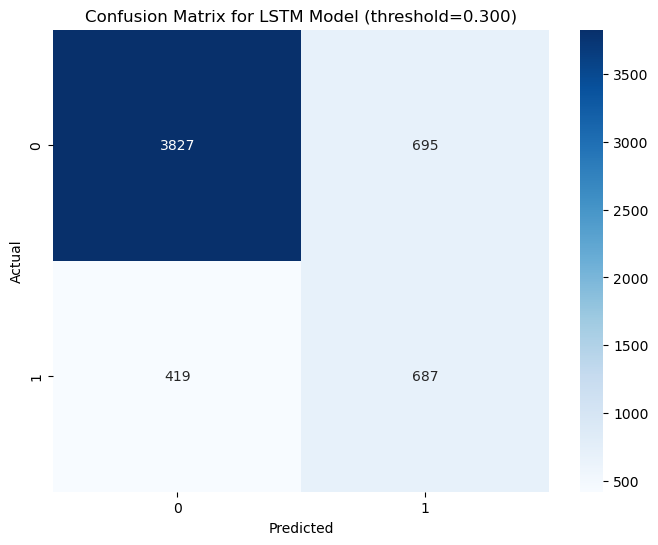

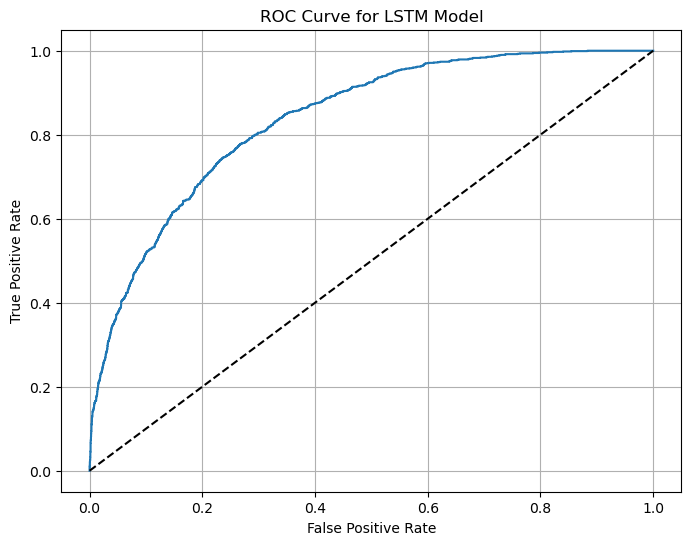

In [27]:
df_pd = churn_features_df.to_pandas()

# Define columns not used as features
exclude_cols = [
   "CHURN", "CLIENT_ID_SAP", "HAS_RECENT_INACTIVITY", "LATEST_TRANSACTION_DATE", "LAST_ACTIVE_MONTH", "MONTHS_SINCE_LAST_ACTIVITY",
    "ACTIVE_MONTHS", "MONTHS_AT_LEVEL", "CUSTOMER_TENURE_DAYS", "TOTAL_SPENT",
    "TOTAL_FUEL_LITERS", "TOTAL_TRANSACTIONS", "FUEL_TRANSACTIONS_COUNT", "LAST_TRANSACTION_DATE", "FIRST_ACTIVE_MONTH", "FIRST_TRANSACTION_DATE"
]

features_cols = [col for col in df_pd.columns if col not in exclude_cols]

# Split data into features and target variable
X = df_pd[features_cols]
y = df_pd["CHURN"]

print(f"Features used: {features_cols}")
print(f"Shape of X: {X.shape}, shape of y: {y.shape}")

# Fill potential NaNs in tabular data
X = X.fillna(0)
y = y.fillna(0)

# Split data with stratification (80/20 train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# If NaNs remain after scaling, replace them with zeros
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
X_test_scaled  = np.nan_to_num(X_test_scaled, nan=0.0)

print("Are there any NaNs in X_train_scaled?", np.isnan(X_train_scaled).any())

# Add a dummy sequence dimension (seq_len=1) for LSTM input
X_train_seq = np.expand_dims(X_train_scaled, axis=1)  # [n_samples, 1, n_features]
X_test_seq  = np.expand_dims(X_test_scaled, axis=1)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor  = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader   = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device Configuration
device = torch.device("cuda")
print("Using device:", device)

# LSTM Model Definition
class ChurnLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1, bidirectional=False, dropout=0.0):
        """
        input_size: number of features per time step (e.g., len(features_cols))
        hidden_size: LSTM hidden state size
        num_layers: number of LSTM layers
        bidirectional: use bidirectional LSTM if True
        dropout: dropout rate after LSTM layer
        """
        super(ChurnLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional
        )
        lstm_out_dim = hidden_size * (2 if bidirectional else 1)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(lstm_out_dim, 1)  # Output layer (logits)
        
    def forward(self, x):
        # x: [batch, seq_len, input_size]
        lstm_out, _ = self.lstm(x)  # [batch, seq_len, lstm_out_dim]
        # Take the output of the last time step
        last_output = lstm_out[:, -1, :]  # [batch, lstm_out_dim]
        out = self.dropout(last_output)
        logits = self.fc(out)  # [batch, 1]
        return logits

n_features = X_train_tensor.size(2)
model = ChurnLSTM(input_size=n_features, hidden_size=50, num_layers=1, bidirectional=False, dropout=0.0)
model.to(device)
print(model)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

# Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training and Evaluation Functions
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for i, (inputs, labels) in enumerate(loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(inputs).squeeze(-1)
        if torch.isnan(logits).any():
            print(f"Batch {i}: Logits contain NaN, skipping this batch.")
            continue
        loss = criterion(logits, labels.squeeze())
        if torch.isnan(loss):
            print(f"Batch {i}: Loss is NaN, skipping this batch.")
            continue
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Gradient clipping
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logits = model(inputs).squeeze(-1)
            loss = criterion(logits, labels.squeeze())
            total_loss += loss.item() * inputs.size(0)
            preds = (torch.sigmoid(logits) > 0.5).float() # Apply sigmoid and threshold
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    acc = accuracy_score(all_labels, all_preds)
    return total_loss / len(loader.dataset), acc

# Training Loop with Early Stopping
num_epochs = 30
patience = 5
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_acc = evaluate(model, test_loader, criterion)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f} | Val Acc: {val_acc:.4f}")
    if not np.isnan(val_loss) and val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict().copy() # Save best model state
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            if best_model_state is not None:
                model.load_state_dict(best_model_state) # Load best model state
            break

# Final Evaluation with Automatic Threshold Selection
model.eval()
all_probs = []
all_labels = []

# Get probabilities and labels from the test set
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        logits = model(inputs).squeeze(-1)
        probs = torch.sigmoid(logits)
        all_probs.append(probs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_probs = np.concatenate(all_probs)
all_labels = np.concatenate(all_labels)

# Find the optimal threshold based on F1-score
thresholds = np.arange(0.1, 0.9, 0.05)
best_f1 = 0
best_threshold = 0.5

for threshold in thresholds:
    preds = (all_probs > threshold).astype(int)
    f1 = f1_score(all_labels, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Optimal threshold: {best_threshold:.3f} with F1-score: {best_f1:.4f}")

# Apply the optimal threshold
final_preds = (all_probs > best_threshold).astype(int)

# Print metrics with the optimal threshold
print("Test Accuracy:", accuracy_score(all_labels, final_preds))
print("Classification Report:\n", classification_report(all_labels, final_preds))

# Visualize Confusion Matrix
cm = confusion_matrix(all_labels, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for LSTM Model (threshold={best_threshold:.3f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--') # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model')
plt.grid(True)
plt.show()


# LSTM: Hyperparameter Optimization with Optuna and Automated Threshold Selection

[I 2025-03-12 16:15:44,061] A new study created in memory with name: no-name-bd98f337-91f9-42a9-a4d1-1437005cc763


Запуск LSTM модели с Optuna для предсказания оттока
Используемые признаки: ['HAS_EMAIL', 'HAS_SMS', 'HAS_VKL', 'AVG_TRANSACTION_VALUE', 'NON_FUEL_TRANSACTIONS_COUNT', 'TRANSACTION_COUNT_VOLATILITY', 'AVG_MONTHLY_TRANSACTIONS', 'LAST_MONTH_TRANSACTIONS', 'LAST_MONTH_SPENT', 'LAST_MONTH_FUEL_TRANS', 'LAST_3M_TRANSACTION_COUNT', 'LAST_3M_TOTAL_SPENT', 'LAST_3M_AVG_TRANSACTION', 'LAST_3M_AVG_TRANSACTIONS', 'LAST_3M_AVG_SPENT', 'RECENT_TRANSACTION_TREND', 'RECENT_SPENDING_TREND', 'AVG_GAP_BETWEEN_ACTIVE_MONTHS', 'MAX_GAP_BETWEEN_ACTIVE_MONTHS', 'MONTHLY_ACTIVITY_DENSITY', 'RECENT_VS_HISTORICAL_ACTIVITY', 'RECENT_VS_HISTORICAL_SPENDING', 'PERCENT_TRANSACTION_TREND', 'PERCENT_SPENDING_TREND', 'IS_NEW_CUSTOMER', 'IS_MID_TENURE_CUSTOMER', 'IS_ESTABLISHED_CUSTOMER', 'TREND_RELIABILITY', 'NORMALIZED_VOLATILITY', 'LAST_MONTH_TRANSACTIONS_Z_SCORE', 'HAS_IRREGULAR_ACTIVITY', 'IS_CONSISTENT_CUSTOMER', 'MAX_RECENT_INACTIVITY_PERIOD', 'FUEL_TRANSACTION_PERCENTAGE', 'NON_FUEL_TRANSACTION_PERCENTAGE', 'A

[I 2025-03-12 16:16:18,439] Trial 0 finished with value: 0.9081826601393389 and parameters: {'hidden_size': 219, 'num_layers': 1, 'dropout': 0.44312990110374184, 'learning_rate': 0.0004290942514455281, 'batch_size': 128, 'bidirectional': True}. Best is trial 0 with value: 0.9081826601393389.
[I 2025-03-12 16:16:40,039] Trial 1 finished with value: 0.9023554125181052 and parameters: {'hidden_size': 60, 'num_layers': 3, 'dropout': 0.43802507758137843, 'learning_rate': 0.009867686102332456, 'batch_size': 128, 'bidirectional': True}. Best is trial 0 with value: 0.9081826601393389.
[I 2025-03-12 16:18:15,227] Trial 2 finished with value: 0.9116647325152579 and parameters: {'hidden_size': 207, 'num_layers': 1, 'dropout': 0.3367350685510381, 'learning_rate': 0.00029042775007304095, 'batch_size': 32, 'bidirectional': False}. Best is trial 2 with value: 0.9116647325152579.
[I 2025-03-12 16:20:03,995] Trial 3 finished with value: 0.9129693849558478 and parameters: {'hidden_size': 128, 'num_layer


Лучшие гиперпараметры:
    hidden_size: 249
    num_layers: 2
    dropout: 0.37257295854095274
    learning_rate: 0.00204816900623141
    batch_size: 64
    bidirectional: False
Epoch 1/30 | Train Loss: 0.390729 | Val Loss: 0.385132
Epoch 2/30 | Train Loss: 0.351333 | Val Loss: 0.358028
Epoch 3/30 | Train Loss: 0.323899 | Val Loss: 0.314284
Epoch 4/30 | Train Loss: 0.296808 | Val Loss: 0.289897
Epoch 5/30 | Train Loss: 0.281098 | Val Loss: 0.295868
Epoch 6/30 | Train Loss: 0.271692 | Val Loss: 0.273355
Epoch 7/30 | Train Loss: 0.261957 | Val Loss: 0.279096
Epoch 8/30 | Train Loss: 0.257978 | Val Loss: 0.276047
Epoch 9/30 | Train Loss: 0.254397 | Val Loss: 0.280306
Epoch 10/30 | Train Loss: 0.246899 | Val Loss: 0.285837
Epoch 11/30 | Train Loss: 0.243413 | Val Loss: 0.270510
Epoch 12/30 | Train Loss: 0.241687 | Val Loss: 0.277943
Epoch 13/30 | Train Loss: 0.237152 | Val Loss: 0.271158
Epoch 14/30 | Train Loss: 0.232852 | Val Loss: 0.265120
Epoch 15/30 | Train Loss: 0.232107 | Val Loss:

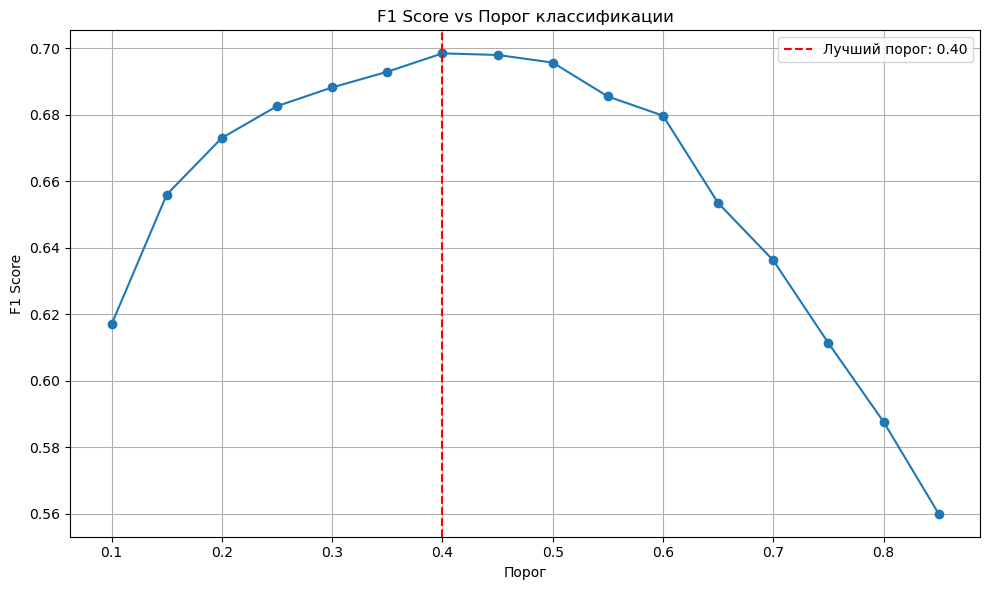


Test Accuracy (порог=0.40): 0.8843283582089553

Classification Report (порог=0.40):
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      4522
         1.0       0.72      0.68      0.70      1106

    accuracy                           0.88      5628
   macro avg       0.82      0.81      0.81      5628
weighted avg       0.88      0.88      0.88      5628



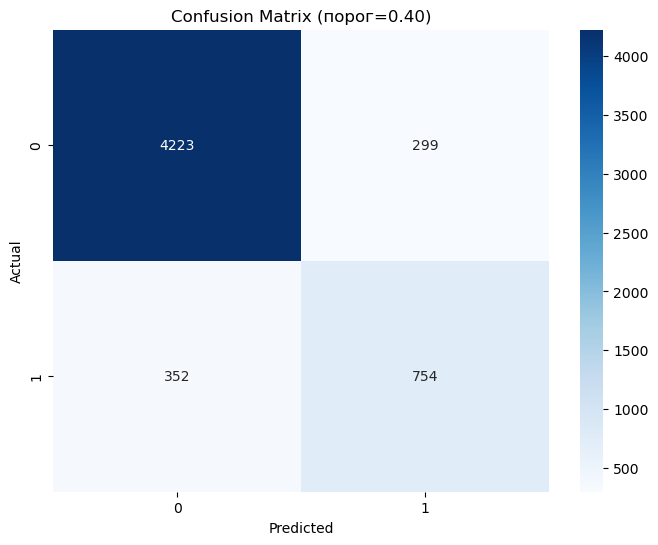

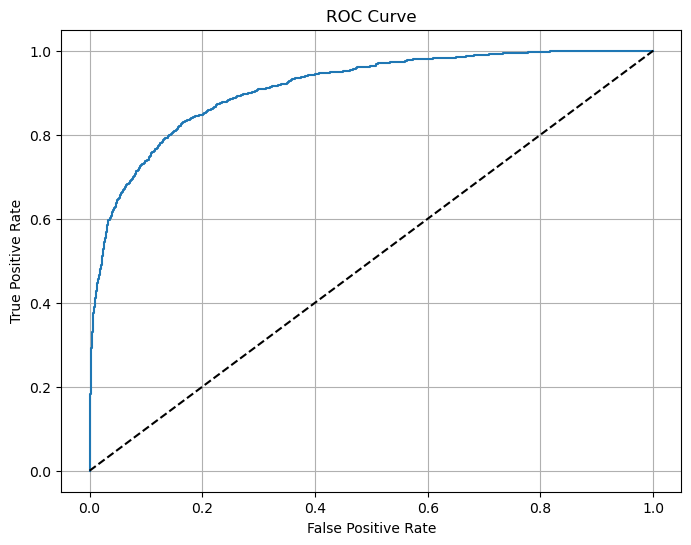

In [34]:
# Data Preparation
df_pd = churn_features_df.to_pandas() # Convert Polars DataFrame to Pandas

# Define columns to exclude from features
exclude_cols = [
    "CHURN", "CLIENT_ID_SAP", "HAS_RECENT_INACTIVITY", "LATEST_TRANSACTION_DATE", "LAST_ACTIVE_MONTH", "MONTHS_SINCE_LAST_ACTIVITY",
    "ACTIVE_MONTHS", "MONTHS_AT_LEVEL", "CUSTOMER_TENURE_DAYS", "TOTAL_SPENT",
    "TOTAL_FUEL_LITERS", "TOTAL_TRANSACTIONS", "FUEL_TRANSACTIONS_COUNT", "LAST_TRANSACTION_DATE", "FIRST_ACTIVE_MONTH", "FIRST_TRANSACTION_DATE"
]
features_cols = [col for col in df_pd.columns if col not in exclude_cols]

X = df_pd[features_cols]
y = df_pd["CHURN"]

print(f"Features used: {features_cols}")
print(f"Shape of X: {X.shape}, shape of y: {y.shape}")

# Fill NaN values with 0
X = X.fillna(0)
y = y.fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure no NaNs after scaling (can happen with empty columns or extreme values)
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0)

# Reshape data for LSTM (add sequence dimension)
X_train_seq = np.expand_dims(X_train_scaled, axis=1)
X_test_seq = np.expand_dims(X_test_scaled, axis=1)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create TensorDatasets for DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Use GPU if available
print("Using device:", device)

# LSTM Model Definition
class ChurnLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1, bidirectional=False, dropout=0.0):
        super(ChurnLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True, # Input tensor format: (batch, seq, feature)
            bidirectional=bidirectional
        )
        lstm_out_dim = hidden_size * (2 if bidirectional else 1) # Adjust output dim for bidirectionality
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(lstm_out_dim, 1) # Output layer for binary classification
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_output = lstm_out[:, -1, :] # Get the output of the last time step
        out = self.dropout(last_output)
        logits = self.fc(out)
        return logits

# Training function for one epoch
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for i, (inputs, labels) in enumerate(loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(inputs).squeeze(-1)
        if torch.isnan(logits).any():
            print(f"Batch {i}: logits contain NaN, skipping this batch.")
            continue
        loss = criterion(logits, labels.squeeze())
        if torch.isnan(loss):
            print(f"Batch {i}: loss is NaN, skipping this batch.")
            continue
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Gradient clipping
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
    return total_loss / len(loader.dataset)

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logits = model(inputs).squeeze(-1)
            loss = criterion(logits, labels.squeeze())
            total_loss += loss.item() * inputs.size(0)
            preds = torch.sigmoid(logits) # Convert logits to probabilities
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return total_loss / len(loader.dataset), all_preds, all_labels

# Optuna objective function for hyperparameter tuning
def objective(trial):
    # Define hyperparameter search space
    params = {
        'hidden_size': trial.suggest_int('hidden_size', 32, 256),
        'num_layers': trial.suggest_int('num_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.1, 0.5),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True),
        'batch_size': trial.suggest_categorical('batch_size', [32, 64, 128]),
        'bidirectional': trial.suggest_categorical('bidirectional', [True, False])
    }
    
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    model = ChurnLSTM(
        input_size=X_train_tensor.size(2), # Number of features
        hidden_size=params['hidden_size'],
        num_layers=params['num_layers'],
        bidirectional=params['bidirectional'],
        dropout=params['dropout']
    )
    model.to(device)
    
    criterion = nn.BCEWithLogitsLoss() # Suitable for binary classification
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    
    best_val_loss = float('inf')
    patience = 5 # Early stopping patience
    patience_counter = 0
    
    # Training loop for the trial
    for epoch in range(30): # Max epochs for a trial
        train_loss = train_epoch(model, train_loader, criterion, optimizer)
        val_loss, val_preds, val_labels = evaluate(model, test_loader, criterion)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break # Early stopping
    
    final_auc = roc_auc_score(val_labels, val_preds) # Metric to optimize
    return final_auc

# Run Optuna optimization
study = optuna.create_study(direction='maximize') # Maximize ROC AUC
study.optimize(objective, n_trials=20) # Number of trials

print("\nBest hyperparameters:")
for key, value in study.best_params.items():
    print(f"    {key}: {value}")

# Train the final model with the best parameters
best_params = study.best_params

final_train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
final_test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False)

final_model = ChurnLSTM(
    input_size=X_train_tensor.size(2),
    hidden_size=best_params['hidden_size'],
    num_layers=best_params['num_layers'],
    bidirectional=best_params['bidirectional'],
    dropout=best_params['dropout']
)
final_model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])

# Final model training loop
num_epochs = 30 # Max epochs for final training
patience = 5
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    train_loss = train_epoch(final_model, final_train_loader, criterion, optimizer)
    val_loss, val_preds, val_labels = evaluate(final_model, final_test_loader, criterion)
    
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = final_model.state_dict().copy() # Save the best model state
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            if best_model_state is not None:
                final_model.load_state_dict(best_model_state) # Load the best model
            break

# Final evaluation with optimal threshold
final_model.eval()
_, test_preds, test_labels = evaluate(final_model, final_test_loader, criterion)

# Find optimal classification threshold based on F1-score
print("\nFinding optimal classification threshold...")
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for threshold in thresholds:
    test_binary_preds = (test_preds > threshold).astype(int)
    f1 = f1_score(test_labels, test_binary_preds)
    f1_scores.append(f1)
    print(f"Threshold: {threshold:.2f}, F1 Score: {f1:.4f}")

best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
best_f1 = f1_scores[best_threshold_idx]

print(f"\nOptimal threshold: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

# Visualize F1 scores vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Classification Threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Final predictions with optimal threshold
test_binary_preds = (test_preds > best_threshold).astype(int)

print(f"\nTest Accuracy (threshold={best_threshold:.2f}):", 
      accuracy_score(test_labels, test_binary_preds))
print(f"\nClassification Report (threshold={best_threshold:.2f}):\n", 
      classification_report(test_labels, test_binary_preds))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_binary_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (threshold={best_threshold:.2f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(test_labels, test_preds) # Use probabilities for ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(test_labels, test_preds):.2f}')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()